# Proyek Analisis Data: Bike- Share-Dataset
- **Nama:** Nabil Habib Mochamad
- **Email:** mnabilhabib@gmail.com
- **ID Dicoding:** Nabil Habib Mochamad

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan musim ?
- Bagaimana tren peminjaman berdasarkan jam dalam sehari ?
- apakah kondisi cuaca mempengaruhi jumlah peminjaman sepeda ?

## Import Semua Packages/Library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel "day" menjadi sebuah DataFrame
days_df = pd.read_csv("https://raw.githubusercontent.com/nabilpoppet/datasetpython/refs/heads/main/Bike-sharing-dataset/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel "hour" menjadi sebuah DataFrame
hours_df = pd.read_csv("https://raw.githubusercontent.com/nabilpoppet/datasetpython/refs/heads/main/Bike-sharing-dataset/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Menampilkan 5 baris pertama pada DataFrame days_df
- Menampilkan 5 baris pertama pada DataFrame hours_df

### Assesessing Data

In [4]:
# Menilai Data "days_df"
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecek missing values pada Data "days_df"
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Memeriksa duplikasi data pada Data "days_df"
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Memeriksa parameter statistik
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Menilai Data "hours_df"
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Mengecek missing values pada Data "hours_df"
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
# Memeriksa duplikasi data pada Data "hours_df"
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Memeriksa parameter statistik
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
# -mengecek nilai unik pada kolom-kolom
category_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

# -mengecek nilai unik di days_df
print("Nilai unik pada days_df:")
for col in category_columns:
    print(f"{col}: {days_df[col].unique()}")

print("\n Nilai unik pada hour_df:")
# -mengecek nilai unik di hour_df
for col in category_columns + ["hr"]:  # hour_df punya kolom tambahan "hr"
    print(f"{col}: {hours_df[col].unique()}")


Nilai unik pada days_df:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]

 Nilai unik pada hour_df:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]
hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


**Insight**
- Kolom dteday pada DataFrame days_df dan hours_df masih bertipe object, seharusnya bertipe datetime.
- Tidak terdapat missing values pada kedua DataFrame.
- Tidak terdapat duplikasi data pada Kedua DataFrame.
- Terdapat ketidaksamaan pada bagian nilai maksimum yang terdapat pada kolom weitherlit di DataFrame days_df dan hours_df
- nilai maksimum weathersit adalah 3, tetapi di hours_df, ditemukan weathersit = 4, ini menunjukkan inkonsistensi dalam data.
- Tipe data kategori pada beberapa kolom (season, yr, mnth, holiday, weekday, workingday, weathersit, dan hr) masih dalam bentuk numerik, sebaiknya diubah menjadi tipe kategori agar lebih mudah dalam analisis.

### Cleaning Data

In [13]:
# Membersihkan Data days_df dan Data hours_df
# -mengganti tipe data pada kolom "dteday" menjadi datetime.
datetime_columns = ["dteday"]

for column in datetime_columns:
    days_df[column] = pd.to_datetime(days_df[column])
    hours_df[column] = pd.to_datetime(hours_df[column])

In [14]:
# -mengecek hasil perubahan tipe data
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
# -menghapus baris dengan weathersit = 4
hours_df = hours_df[hours_df["weathersit"] <= 3]

In [16]:
# -mengecek nilai "weathersit" di hours_df
hours_df["weathersit"].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419


In [17]:
season_map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
weathersit_map = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow"}
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
month_map = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
year_map = {0: 2011, 1: 2012}

for df in [days_df, hours_df]:
    df["season"] = df["season"].map(season_map)
    df["weathersit"] = df["weathersit"].map(weathersit_map)
    df["weekday"] = df["weekday"].map(weekday_map)
    df["mnth"] = df["mnth"].map(month_map)
    df["yr"] = df["yr"].map(year_map)

print("Data Cleaning Selesai!")

Data Cleaning Selesai!


In [18]:
# -mengecek hasil perubahan tipe data
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight**
- Perbaikan tipe data kolom dteday pada days_df dan hours_df telah dirubah dari tipe object menjadi tipe datetime.
- Perbaikan tipe data kolom kategori (season, yr, mnth, holiday, weekday, workingday, weathersit, dan hr pada hour_df) telah dikonversi menjadi tipe category untuk memudahkan analisis.
- Penanganan Data tidak valid dimana nilai weathersit = 4 pada hours_df, padahal pada days_df nilai maksimumnya 3. maka dari itu dilakukan penghapusan untuk menjaga konsistensi.


## Explorasi Data Analysis (EDA)

**Explorasi Data**

In [19]:
# -melihat statistik peminjaman sepeda per musim
days_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean"]
})

cnt                   
         max   min         mean
season                         
Fall    8555    22  4728.162921
Spring  8362   795  4992.331522
Summer  8714  1115  5644.303191
Winter  7836   431  2604.132597

In [20]:
# -mengecek jumlah hari unik permusim
days_df["season"].value_counts()

,count
season,
Summer,188
Spring,184
Winter,181
Fall,178


In [21]:
# -melihat tren peminjaman sepeda sepanjang tahun
days_df.groupby("mnth")["cnt"].mean()

,cnt
mnth,
April,4484.900000
August,5664.419355
December,3403.806452
February,2655.298246
January,2176.338710
July,5563.677419
June,5772.366667
March,3692.258065
May,5349.774194


In [22]:
# -melihat distribusi peminjaman sepeda berdasarkan jam(hr) pada hours_df
hours_df.groupby("hr")["cnt"].describe()
hours_df.groupby("hr")["cnt"].mean()

,cnt
hr,
0,53.898072
1,33.390041
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [23]:
# melihat jumlah peminjaman berdasarkan konsidi cuaca (weathersit)
hours_df.groupby("weathersit")["cnt"].describe()
hours_df.groupby("weathersit")["cnt"].mean()

,cnt
weathersit,
Clear,204.869272
Light Rain/Snow,111.579281
Mist/Cloudy,175.165493


**Insight**
- Musim Summer memiliki jumlah peminjaman tertinggi dengan rata-rata 5644 peminjaman perhari.
- Musim Winter memiliki peminjaman terendah dengan rata-rata 2604 peminjaman perhari.
- Aktivitas Peminjaman sepeda rendah pada dini hari (Pukul 0-5).
- Puncak peminjaman terjadi pada jam 8, 17, 18, dan 19.
- Cuaca Clear memiliki rata-rata peminjaman tertinggi 204 peminjaman per jam.
-Cuaca Mist/Cloudy terdapat penurunan dengan rata-rata 175 peminjaman per jam.
- Cuaca Light rain/Snow memiliki rata-rata peminjaman terendah 111 peminjaman perjam.

## Visualization & Explanatory Analysis

### Pertanyaan Pertama
**Bagaimana pola peminjaman sepeda berdasarkan musim ?**

In [35]:
# -membuat DataFrame untuk mengetahui informasi terkait pertanyaan no.1
season_df = days_df.groupby(by="season").agg(
    total_rentals=("cnt", "sum"),
    average_rentals=("cnt", "mean"),
    max_rentals=("cnt", "max"),
    min_rentals=("cnt", "min"),
    count_days=("cnt", "count")
).reset_index()

season_df

,season,total_rentals,average_rentals,max_rentals,min_rentals,count_days
0,Fall,841613,4728.162921,8555,22,178
1,Spring,918589,4992.331522,8362,795,184
2,Summer,1061129,5644.303191,8714,1115,188
3,Winter,471348,2604.132597,7836,431,181


<ipython-input-36-d0cdb173f2b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='season', y='cnt', data=days_df, estimator=sum, palette='Blues')


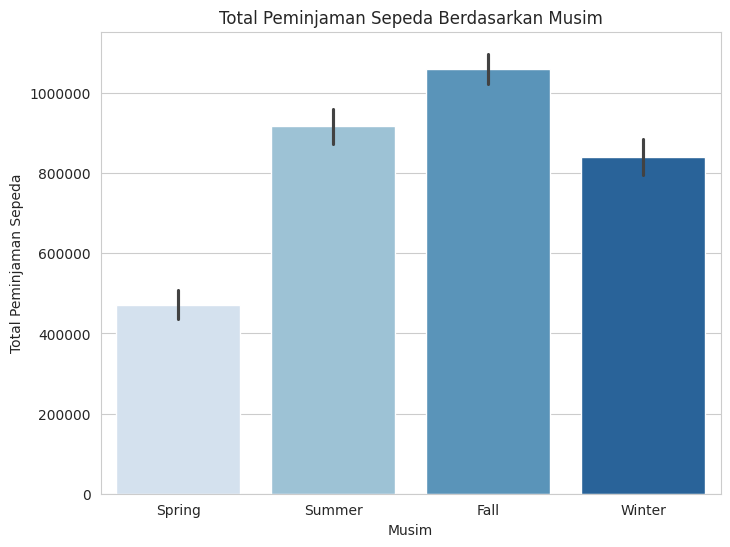

In [36]:
# 1. Visualisasi Pola Peminjaman Sepeda Berdasarkan Musim
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x='season', y='cnt', data=days_df, estimator=sum, palette='Blues')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
plt.title("Total Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

###Pertanyaan Kedua

**Bagaimana tren peminjaman berdasarkan jam dalam sehari ?**

In [37]:
# -membuat DataFrame untuk mengetahui informasi terkait pertanyaan no.2
hourly_df = hours_df.groupby(by="hr").agg(
    total_rentals=("cnt", "mean"),
    max_rentals=("cnt", "max"),
    min_rentals=("cnt", "min"),
    total_days=("cnt", "count")
).reset_index()

hourly_df


,hr,total_rentals,max_rentals,min_rentals,total_days
0,0,53.898072,283,2,726
1,1,33.390041,168,1,723
2,2,22.869930,132,1,715
3,3,11.727403,79,1,697
4,4,6.352941,28,1,697
5,5,19.889819,66,1,717
6,6,76.044138,213,1,725
7,7,212.064649,596,1,727
8,8,359.011004,839,5,727
9,9,219.309491,426,14,727


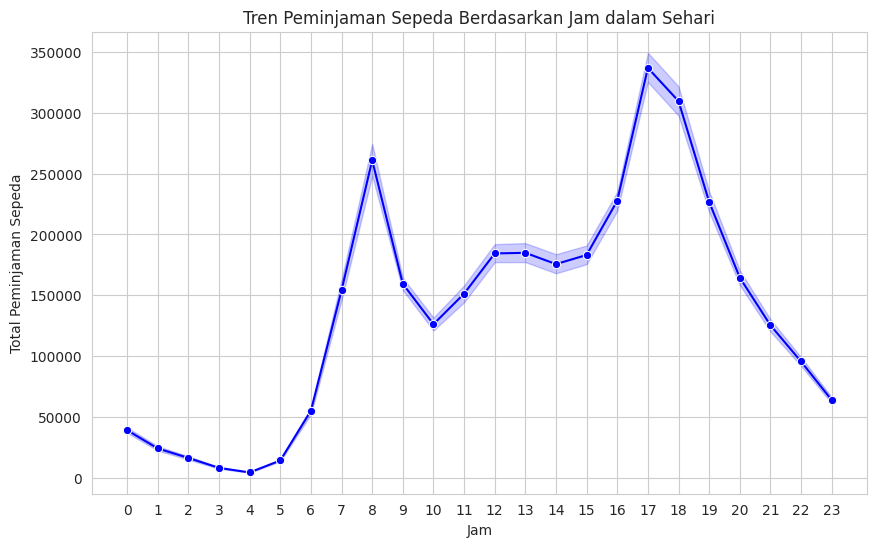

In [38]:
# 2. Visualisasi Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari
plt.figure(figsize=(10, 6))
ax2 = sns.lineplot(x='hr', y='cnt', data=hours_df, estimator=sum, marker='o', color='b')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
plt.title("Tren Peminjaman Sepeda Berdasarkan Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Total Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

###Pertanyaan Ketiga

**apakah kondisi cuaca mempengaruhi jumlah peminjaman sepeda ?**

In [39]:
# -membuat DataFrame untuk mengetahui informasi terkait pertanyaan no.3
weather_df = hours_df.groupby(by="weathersit").agg(
    total_rentals=("cnt", "mean"),
    avg_rentals=("cnt", "mean"),
    max_rentals=("cnt", "max"),
    min_rentals=("cnt", "min"),
    total_hours=("cnt", "count")
    ).reset_index()

weather_df

,weathersit,total_rentals,avg_rentals,max_rentals,min_rentals,total_hours
0,Clear,204.869272,204.869272,977,1,11413
1,Light Rain/Snow,111.579281,111.579281,891,1,1419
2,Mist/Cloudy,175.165493,175.165493,957,1,4544


<ipython-input-40-11f6705451d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x='weathersit', y='cnt', data=hours_df, estimator=sum, palette='coolwarm')


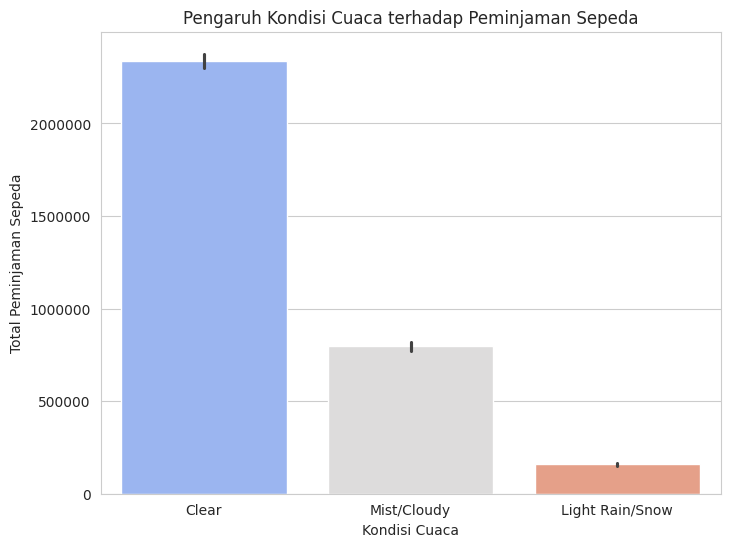

In [40]:
# 3. Visualisasi Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda
plt.figure(figsize=(8, 6))
ax3 = sns.barplot(x='weathersit', y='cnt', data=hours_df, estimator=sum, palette='coolwarm')
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Peminjaman Sepeda")
plt.xticks(ticks=[0, 1, 2,], labels=['Clear', 'Mist/Cloudy', 'Light Rain/Snow'])
plt.show()

**Insight**
1. Peminjaman Sepeda Berdasarkan Musim
   - Dari visualisasi, terlihar bahwa musim Summer memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh musim Fall dan musim Spring.
   - Musim Winter memiliki jumlah peminjaman terndah.
   
  hal ini menunjukan bahwa musim memiliki pengaruh terhadap jumlah peminjaman sepeda.

2. Tren Peminjaman Sepeda Berdasarkan jam dalam Sehari
  - Tren peminjaman sepeda menunjukan dua puncak utama, pada pagi hari sekitar pukul 08.00 dan sore hari sekitar pukul 17.00-18.00
  - Pada malah hari setelah pukul 22.00 dan dini hari sebelum pukul 06.00 peminjaman sepeda menurun drastis.

3. Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda.
 - Kondisi cuaca yang Clear memiliki jumlah peminjaman sepeda tertinggi, diikuti oleh kondisi Mist/Cloudy.
 - Saat Light Rain/Snow jumlah peminjaman turun.


Ini menunjukan bahwa cuaca yang buruk menjadi faktor yang menghambat aktivitas bersepeda.

In [41]:
# menyimpan dataset yang telah dibersihkan
days_df.to_csv("days_df_clean.csv", index=False)
hours_df.to_csv("hours_df_clean.csv", index=False)